In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import seaborn as sns

# Add the parent directory to Python path
notebook_dir = os.path.abspath(os.path.dirname('__file__'))
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

# Get the correct data directory path
data_dir = os.path.join(parent_dir, 'data')

# Create test data loader with existing data
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_dataset = torchvision.datasets.FashionMNIST(
    root=data_dir,  # Use the correct data directory
    train=False,
    download=False,  # Set to False since we already have the data
    transform=test_transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False
)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Let's see an example image from the datatset

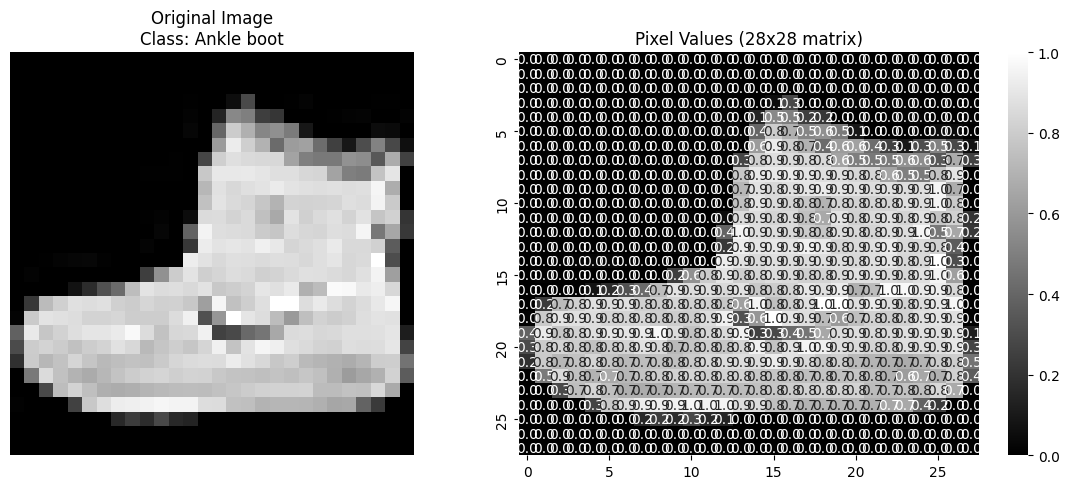


Pixel value statistics:
Min value: 0.00
Max value: 1.00
Mean value: 0.38
Shape: (28, 28)


In [7]:
# Create training dataset for visualization
train_dataset = torchvision.datasets.FashionMNIST(
    root=data_dir,
    train=True,
    download=False,
    transform=transforms.ToTensor()  # Simple transform for visualization
)
# Get one example image
image, label = train_dataset[0]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert to numpy array and squeeze the channel dimension
image_array = image.squeeze().numpy()

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title(f'Original Image\nClass: {class_names[label]}')
plt.axis('off')

# Plot 2: Pixel Values
plt.subplot(1, 2, 2)
sns.heatmap(image_array, cmap='gray', annot=True, fmt='.1f', 
            cbar=True, xticklabels=5, yticklabels=5)
plt.title('Pixel Values (28x28 matrix)')

plt.tight_layout()
plt.show()

# Print some statistics about the pixel values
print(f"\nPixel value statistics:")
print(f"Min value: {image_array.min():.2f}")
print(f"Max value: {image_array.max():.2f}")
print(f"Mean value: {image_array.mean():.2f}")
print(f"Shape: {image_array.shape}")

## How preprocessing looks

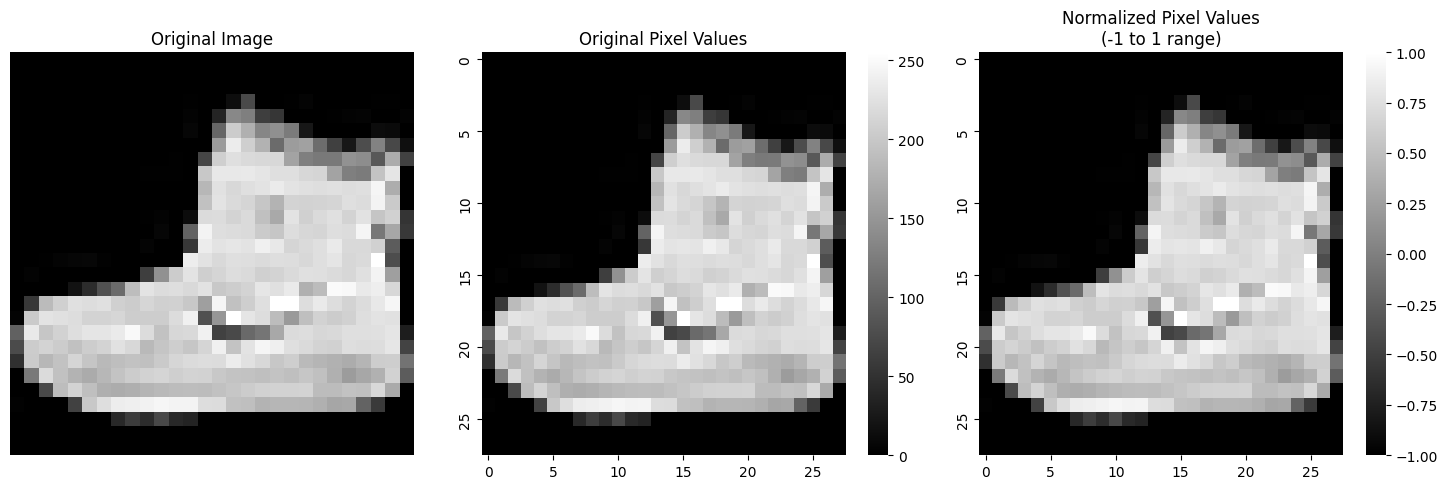

In [8]:
# Create a more detailed preprocessing pipeline
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Get the raw image (without any transforms)
train_dataset_raw = torchvision.datasets.FashionMNIST(
    root=data_dir,  # Use the correct data directory
    train=True,
    download=False,  # Set to False since we already have the data
    transform=None  # No transforms here
)

# Get both raw and processed versions
image_raw, _ = train_dataset_raw[0]  # This will be a PIL image
image_normalized = preprocess(image_raw)  # Apply full preprocessing

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Plot 1: Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_raw, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot 2: Original Pixel Values
plt.subplot(1, 3, 2)
sns.heatmap(np.array(image_raw), cmap='gray', annot=False, 
            cbar=True, xticklabels=5, yticklabels=5)
plt.title('Original Pixel Values')

# Plot 3: Normalized Pixel Values
plt.subplot(1, 3, 3)
sns.heatmap(image_normalized.squeeze(), cmap='gray', annot=False, 
            cbar=True, xticklabels=5, yticklabels=5)
plt.title('Normalized Pixel Values\n(-1 to 1 range)')

plt.tight_layout()
plt.show()

## How convolution works

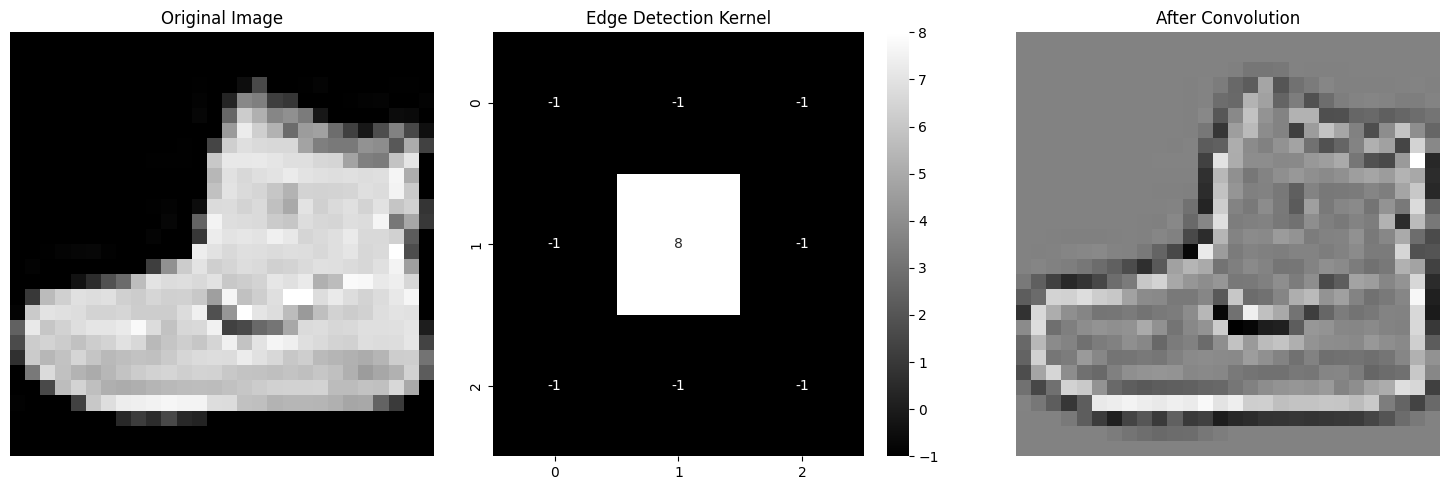

In [9]:
import torch.nn.functional as F

# Create a simple edge detection kernel (Laplacian operator)
edge_kernel = torch.tensor([
    [-1, -1, -1], # Negative weights for surrounding pixels
    [-1,  8, -1], # Positive weight for center pixel
    [-1, -1, -1]  # Finds sudden intensity changes
]).float().view(1, 1, 3, 3)

# Convert PIL Image to tensor and add batch dimension (Python imaging library)
image_tensor = transforms.ToTensor()(image_raw).unsqueeze(0)  # Normalize and add batch dimension
convolved = F.conv2d(image_tensor, edge_kernel, padding=1) # Apply convolution with padding of 1 pixel

plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1) # row, column, plot number
plt.imshow(image_raw, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Edge Detection Kernel
plt.subplot(1, 3, 2)
sns.heatmap(
edge_kernel.squeeze(), # Remove extra dimensions for visual
cmap='gray', # Use grayscale colormap
annot=True, # Show numerical values
fmt='.0f' # Make the numbers integers
)
plt.title('Edge Detection Kernel')

# Convolved Image
plt.subplot(1, 3, 3)
plt.imshow(convolved.squeeze(), cmap='gray') # with squeeze() remove batch and channel dimensions
plt.title('After Convolution')
plt.axis('off')

plt.tight_layout()
plt.show()

# Data augmentation examples

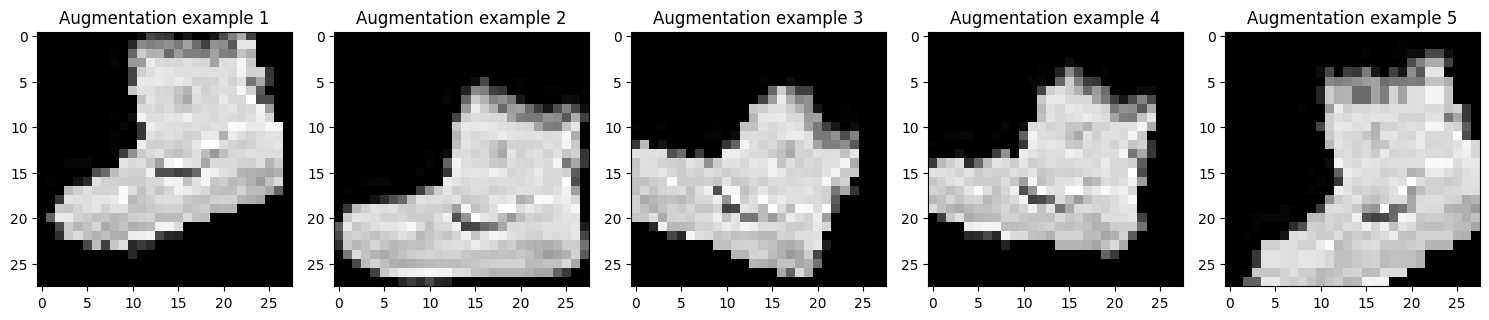

In [14]:
from torchvision import transforms

# Create an augmentation pipeline
train_transform = transforms.Compose([
    transforms.RandomRotation(25),        # Rotate by up to x degrees (25 to make visually more obvious)
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),            # Shift image by up to 10%
        scale=(0.9, 1.1)                 # Scale image by up to ±10%
    ),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset with augmentation
train_dataset_augmented = torchvision.datasets.FashionMNIST(
    root=data_dir, 
    train=True,
    download=False,
    transform=train_transform
)

# Visualize augmentations
plt.figure(figsize=(15, 3))
for i in range(5):
    # Get the same image with different augmentations
    img, _ = train_dataset_augmented[0]
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    # plt.axis('off')
    plt.title(f'Augmentation example {i+1}')

plt.tight_layout()
plt.show()

# Model result analysis

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import seaborn as sns
from model import FashionCNN
from data_loader import get_data_loaders

# 1. Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # cuda == GPU 
model = FashionCNN().to(device)
model.load_state_dict(torch.load('../fashion_cnn.pth'))
model.eval()


# Check what we have
print(f"Using device: {device}")
# More detailed info
if device.type == 'cuda':
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"Memory Available: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Using device: cuda
GPU Device: NVIDIA GeForce RTX 2060
Memory Available: 6.44 GB


C:\Users\User\AppData\Local\Temp\ipykernel_18268\3236942279.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../fashion_cnn.pth'))


In [16]:
# 3. Analyze predictions
def plot_predictions(model, test_loader, num_images=10):
    test_iter = iter(test_loader) # Create iterator from DataLoader

    fig = plt.figure(figsize=(20, 4))
    for idx in range(num_images):
        # Get next image and label for it
        try:
            image, label = next(test_iter)
        except StopIteration:
            test_iter = iter(test_loader)  # Reset iterator if we run out of images, just to be safe
            image, label = next(test_iter)
            
        image = image.to(device) # Move image to GPU (if available)
         
        # Get model prediction without calculating gradients (faster)
        with torch.no_grad():
            output = model(image)
            pred = output.argmax(dim=1).item() # Get highest probability class
            probs = torch.nn.functional.softmax(output, dim=1) # Convert to probabilities
        
        # Plot image and predictions
        ax = plt.subplot(1, num_images, idx + 1) # 1 row, num_images columns, plot number idx + 1
        plt.imshow(image[0][0].cpu(), cmap='gray') # Move back to CPU for plotting
        color = 'green' if pred == label.item() else 'red' # Color-code correct/incorrect
        ax.set_title(f'Pred: {class_names[pred]}\nTrue: {class_names[label.item()]}',
                    color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 4. Confusion Matrix
def plot_confusion_matrix():
    confusion_matrix = np.zeros((10, 10)) # Initialize 10x10 matrix (num_classes x num_classes)
    with torch.no_grad(): # No gradients needed for evaluation
        for images, labels in test_loader:
            images = images.to(device) # Move images to GPU (if available)
            outputs = model(images)  # Get model predictions
            _, predicted = outputs.max(1) # Get highest probability class
            # Update confusion matrix counts
            for label, pred in zip(labels, predicted.cpu()): # Zip together labels and predictions
                confusion_matrix[label][pred] += 1
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g',  # Show numbers in cells and formart as integers
                xticklabels=class_names, yticklabels=class_names) # Use class names for labels
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# 5. Feature Map Visualization
def visualize_feature_maps():
    # Get one sample image
    image, _ = next(iter(test_loader))
    image = image.to(device)
    
    # Get feature maps (function from model.py)
    features1, features2, features3 = model.get_feature_maps(image)
    
    # Plot first few feature maps from each layer
    fig, axes = plt.subplots(3, 8, figsize=(20, 8))
    for idx, features in enumerate([features1, features2, features3]):
        features = features.cpu().detach().numpy()[0]
        for j in range(8):
            axes[idx][j].imshow(features[j], cmap='viridis') # Plot each feature map
            axes[idx][j].axis('off')
    
    plt.suptitle('Feature Maps at Different Layers')
    plt.tight_layout()
    plt.show()

# 6. Class-wise Accuracy
def plot_class_accuracy():
    # Start counters for each class
    # Dictionary comprehension
    correct_pred = {classname: 0 for classname in class_names} # Create dictionary with class names and 0 (counts)
    total_pred = {classname: 0 for classname in class_names} # Create dictionary with class names and 0 (counts)

    with torch.no_grad(): # No gradients needed for evaluation
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predictions = outputs.max(1) # Get predicted classes
            # Update counters for each image
            for label, prediction in zip(labels, predictions.cpu()):
                if label == prediction:
                    correct_pred[class_names[label]] += 1
                total_pred[class_names[label]] += 1

    accuracies = {classname: 100*correct_pred[classname]/total_pred[classname] 
                for classname in class_names} # Calculate accuracy for each class
    
    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values())
    plt.xticks(rotation=45)
    plt.title('Class-wise Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.tight_layout()
    plt.show()

In [17]:
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False
)

1. Sample Predictions:


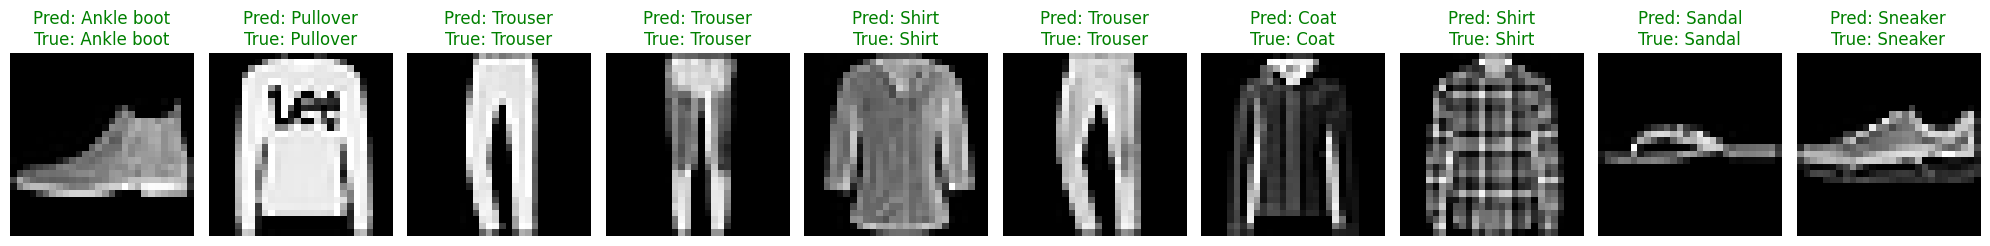

In [18]:
print("1. Sample Predictions:")
plot_predictions(model, test_loader)


2. Confusion Matrix:


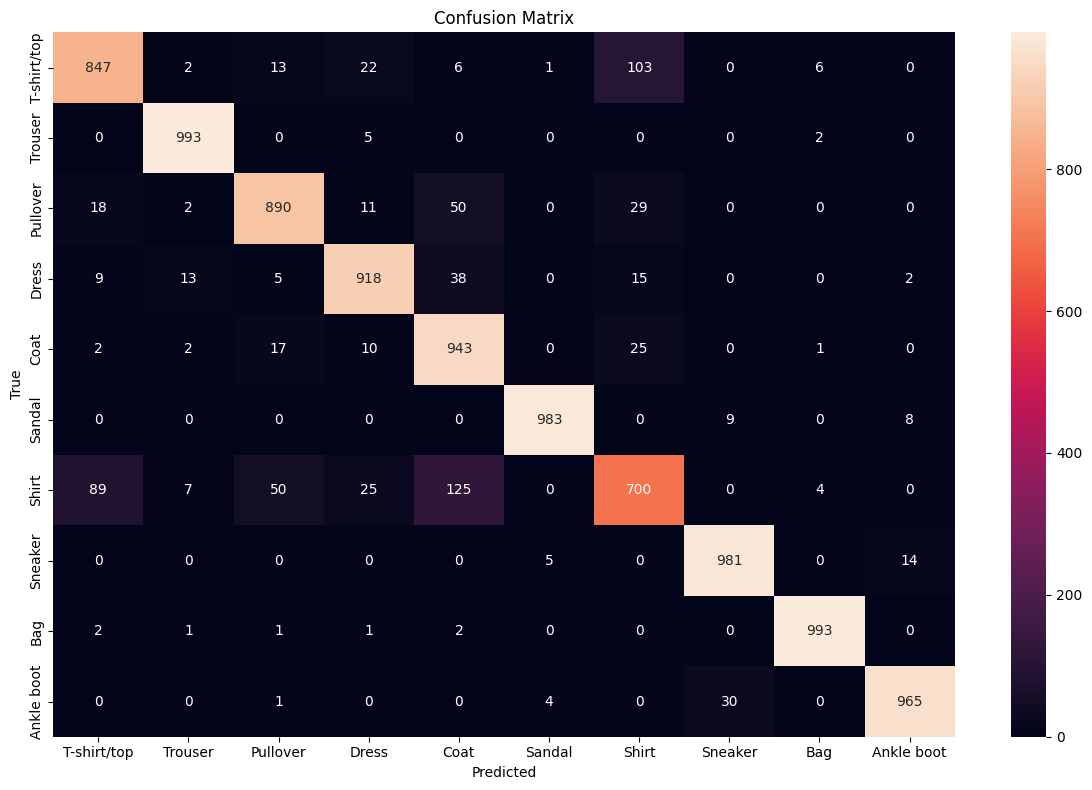

In [19]:
print("\n2. Confusion Matrix:")
plot_confusion_matrix()


3. Feature Maps:


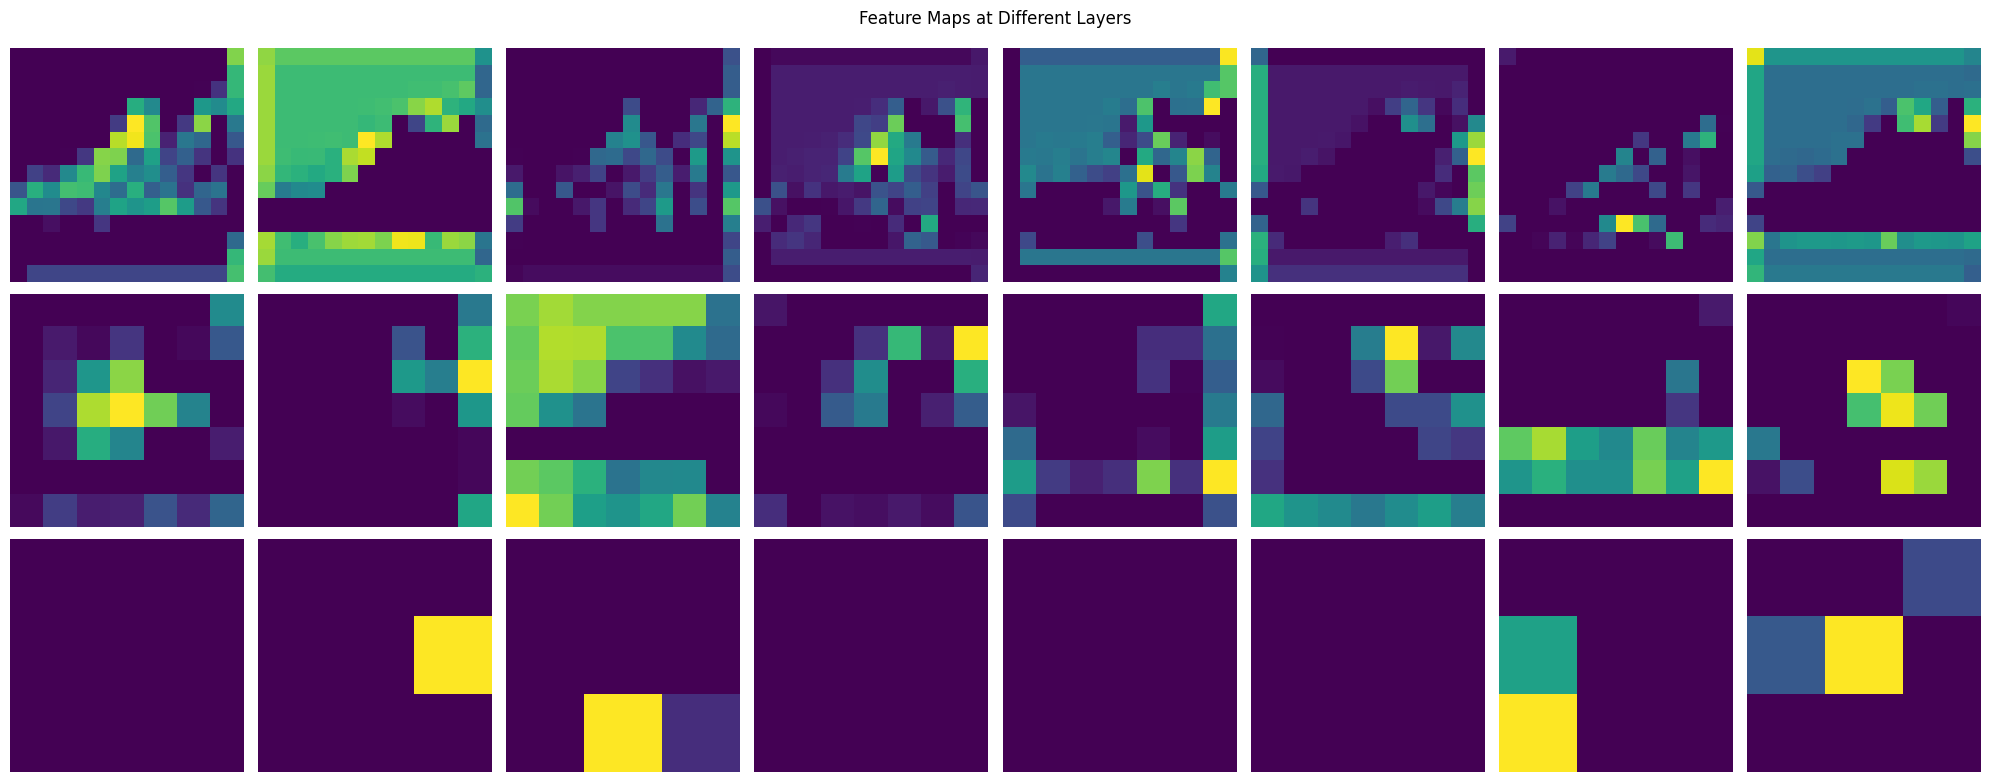

In [20]:
print("\n3. Feature Maps:")
visualize_feature_maps()



4. Class-wise Accuracy:


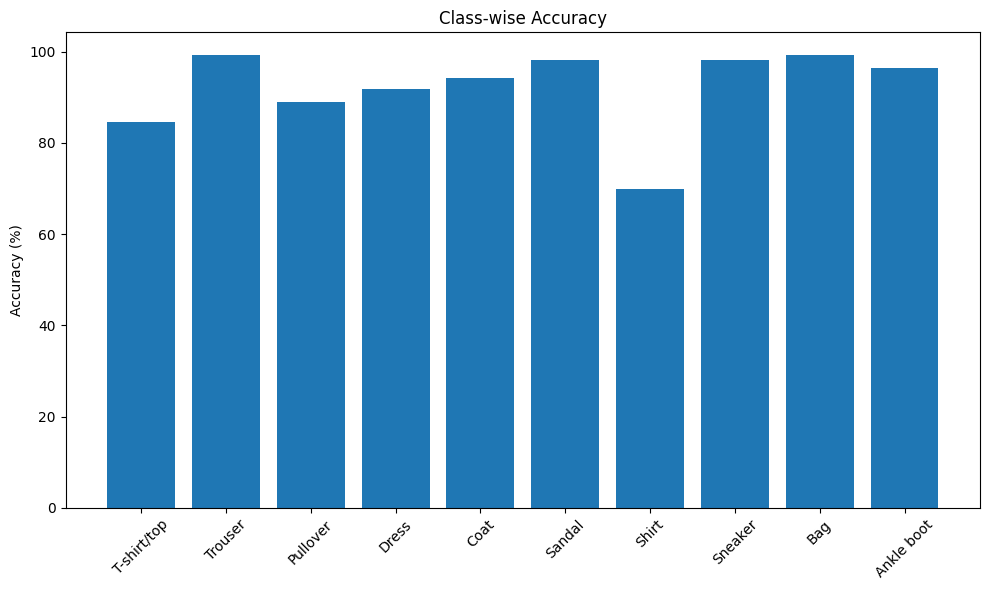

In [21]:
print("\n4. Class-wise Accuracy:")
plot_class_accuracy()